In [75]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [76]:
root = "/Users/rish/Desktop/data"
n = 60 # the different number of speakers
folders = [os.path.join(root, str(i).zfill(2)) for i in range(1, n+1)]
print(folders)

['/Users/rish/Desktop/data/01', '/Users/rish/Desktop/data/02', '/Users/rish/Desktop/data/03', '/Users/rish/Desktop/data/04', '/Users/rish/Desktop/data/05', '/Users/rish/Desktop/data/06', '/Users/rish/Desktop/data/07', '/Users/rish/Desktop/data/08', '/Users/rish/Desktop/data/09', '/Users/rish/Desktop/data/10', '/Users/rish/Desktop/data/11', '/Users/rish/Desktop/data/12', '/Users/rish/Desktop/data/13', '/Users/rish/Desktop/data/14', '/Users/rish/Desktop/data/15', '/Users/rish/Desktop/data/16', '/Users/rish/Desktop/data/17', '/Users/rish/Desktop/data/18', '/Users/rish/Desktop/data/19', '/Users/rish/Desktop/data/20', '/Users/rish/Desktop/data/21', '/Users/rish/Desktop/data/22', '/Users/rish/Desktop/data/23', '/Users/rish/Desktop/data/24', '/Users/rish/Desktop/data/25', '/Users/rish/Desktop/data/26', '/Users/rish/Desktop/data/27', '/Users/rish/Desktop/data/28', '/Users/rish/Desktop/data/29', '/Users/rish/Desktop/data/30', '/Users/rish/Desktop/data/31', '/Users/rish/Desktop/data/32', '/Users

In [77]:
files = []

for folder in folders:
    files += os.listdir(folder)
print(files[:20])

['3_01_10.wav', '2_01_4.wav', '3_01_4.wav', '3_01_38.wav', '4_01_48.wav', '0_01_24.wav', '0_01_30.wav', '0_01_18.wav', '7_01_40.wav', '8_01_14.wav', '8_01_28.wav', '5_01_17.wav', '1_01_47.wav', '6_01_23.wav', '9_01_7.wav', '6_01_37.wav', '8_01_7.wav', '8_01_6.wav', '6_01_36.wav', '6_01_22.wav']


In [78]:
X = []
Y = []

for file in files:
    label = file.split("_")[0]
    human = file.split("_")[1]
    X.append(os.path.join(root, human, file))
    Y.append(label)

print(len(X))
print(len(Y))
print(X[:20])
print(Y[:20])

30000
30000
['/Users/rish/Desktop/data/01/3_01_10.wav', '/Users/rish/Desktop/data/01/2_01_4.wav', '/Users/rish/Desktop/data/01/3_01_4.wav', '/Users/rish/Desktop/data/01/3_01_38.wav', '/Users/rish/Desktop/data/01/4_01_48.wav', '/Users/rish/Desktop/data/01/0_01_24.wav', '/Users/rish/Desktop/data/01/0_01_30.wav', '/Users/rish/Desktop/data/01/0_01_18.wav', '/Users/rish/Desktop/data/01/7_01_40.wav', '/Users/rish/Desktop/data/01/8_01_14.wav', '/Users/rish/Desktop/data/01/8_01_28.wav', '/Users/rish/Desktop/data/01/5_01_17.wav', '/Users/rish/Desktop/data/01/1_01_47.wav', '/Users/rish/Desktop/data/01/6_01_23.wav', '/Users/rish/Desktop/data/01/9_01_7.wav', '/Users/rish/Desktop/data/01/6_01_37.wav', '/Users/rish/Desktop/data/01/8_01_7.wav', '/Users/rish/Desktop/data/01/8_01_6.wav', '/Users/rish/Desktop/data/01/6_01_36.wav', '/Users/rish/Desktop/data/01/6_01_22.wav']
['3', '2', '3', '3', '4', '0', '0', '0', '7', '8', '8', '5', '1', '6', '9', '6', '8', '8', '6', '6']


In [79]:
X[1]

'/Users/rish/Desktop/data/01/2_01_4.wav'

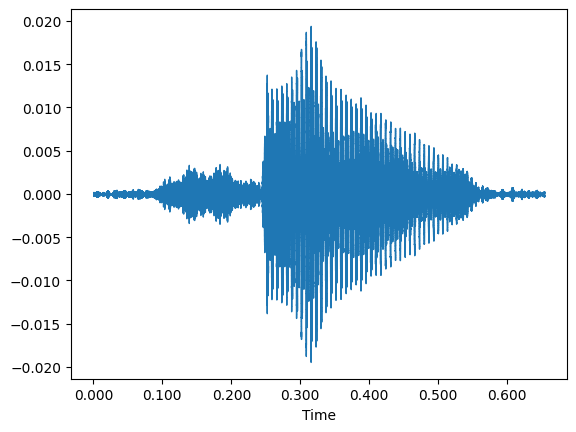

In [80]:
y, sr = librosa.load(X[5])
librosa.display.waveshow(y, sr = sr)

In [81]:
hop_length = 512
n_fft = 200

#make shift time start and end variables
t_start = 0
t_end = 0.6

y_cut = y[int(round(t_start*sr)):int(round(t_end*sr))] #the y values

MFCCs = librosa.feature.mfcc(y=y_cut, n_fft=n_fft,hop_length=hop_length,n_mfcc=128)

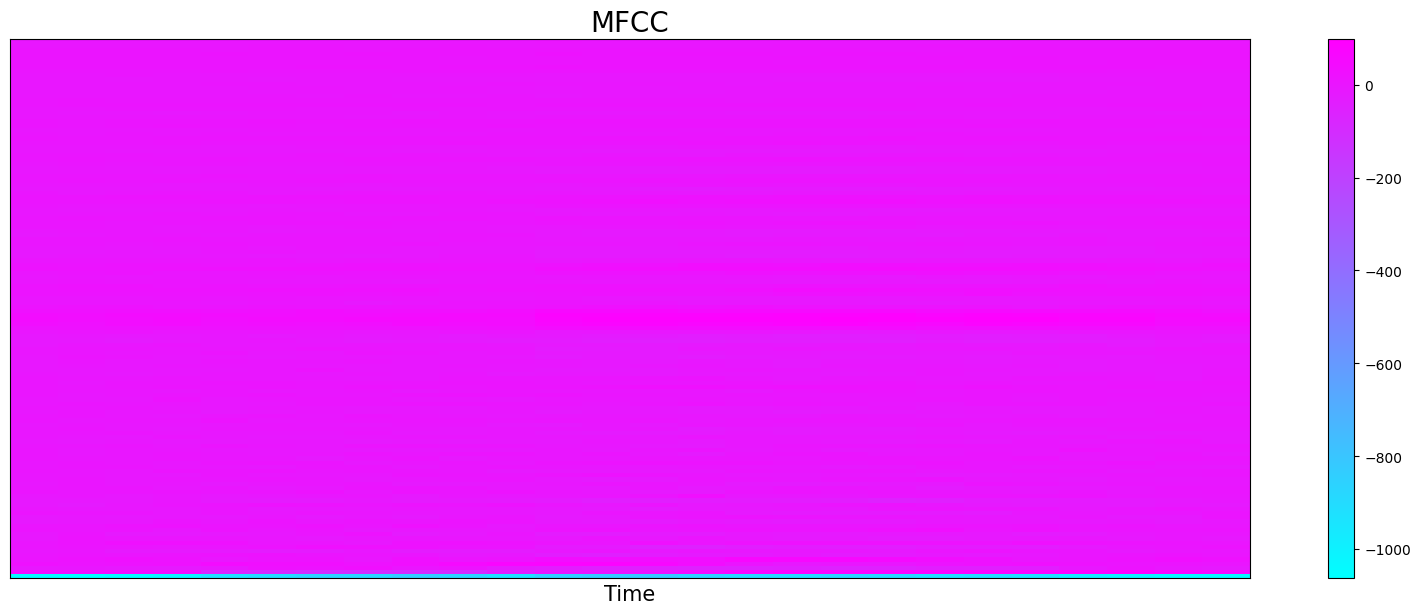

In [82]:
fig, ax = plt.subplots(figsize=(20,7))
librosa.display.specshow(MFCCs,sr=sr, cmap='cool',hop_length=hop_length)
ax.set_xlabel('Time', fontsize=15)
ax.set_title('MFCC', size=20)
plt.colorbar()
plt.show()


In [83]:
len(X)

30000

In [84]:
features = []


hop_length = 512
n_fft = 200  

for i in range(0,len(X)):
    y, sr = librosa.load(X[i])
    #make shift time start and end variables
    t_start = 0
    t_end = 0
  

    y_cut = y[int(round(t_start*sr, ndigits=None)):int(round(t_end*sr, ndigits=None))] #the y values   
    data = np.array([librosa.feature.mfcc(y=y_cut, 
         n_fft=n_fft,hop_length=hop_length,n_mfcc=128)]) 
    features.append(data)


KeyboardInterrupt: 

In [ ]:
X = np.array((features-np.min(features))/(np.max(features)-np.min(features)))
X = X/np.std(features)
y = np.array(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)

(21000, 1, 128, 1)
(21000,)
(9000, 1, 128, 1)
(9000,)


(None, None, None, None)

In [90]:
y_train = [eval(i) for i in y_train]
y_test = [eval(i) for i in y_test]

In [94]:
X_train = np.array(np.expand_dims(np.squeeze(X_train), axis = -1))
X_test = np.array(np.expand_dims(np.squeeze(X_test), axis = -1))
y_test = np.array(y_test)
y_train = np.array(y_train)

print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)

(21000, 128, 1)
(21000,)
(9000, 128, 1)
(9000,)


(None, None, None, None)

In [95]:
type(X_train)

numpy.ndarray

In [96]:
input_shape=(128,1)
model = tf.keras.Sequential()
model.add(LSTM(128,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 24)             │         1,176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,624 (373.53 KB)

 Trainable params: 95,624 (373.53 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])


In [100]:
history = model.fit(X_train, y_train, epochs=10, shuffle=False)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - acc: 0.1024 - loss: 2.3968
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - acc: 0.1041 - loss: 2.3269
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - acc: 0.0982 - loss: 2.3147
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - acc: 0.1014 - loss: 2.3101
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - acc: 0.0986 - loss: 2.3065
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - acc: 0.0997 - loss: 2.3069
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 530s 807ms/step - acc: 0.1013 - loss: 2.3050
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - acc: 0.1025 - loss: 2.3051
Epoch 9/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - acc: 0.0960 - loss: 2.3054
Epoch 10/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - acc: 0.0993 - loss: 2.3047
